# library

In [1]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/zero/anaconda/envs/fastai-cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [253]:
import matplotlib.pyplot as plt

# df

In [238]:
df = pd.DataFrame(columns=['a', 'b'])

In [242]:
for i in range(200): 
    a = random.random()*10
    df.loc[i] = [a, a + random.random()*10]

In [243]:
origin = [0], [0]

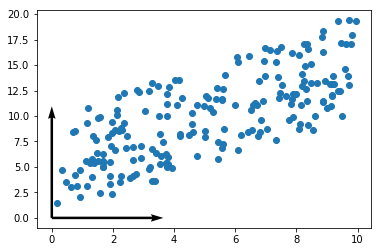

In [244]:
plt.scatter(x = df.a, y = df.b)
plt.quiver(*origin, [0,1], [1,0], scale=3)

# subtract the mean

In [246]:
df['a'] = df['a'] - np.mean(df['a'])

In [245]:
df['b'] = df['b'] - np.mean(df['b'])

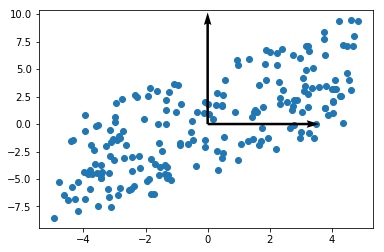

In [249]:
plt.scatter(x = df.a, y = df.b)
plt.quiver(*origin, [0,1], [1,0], scale=3)

In [247]:
df_values = df.astype(float).values

In [248]:
df_T = df_values.T

# Covariance Matrix

In [250]:
covariance_matrix = np.cov(df_T)

#  Eigende values and  Eigende vector

In [55]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [288]:
eig_vals

array([ 3.5967482 , 22.89018713])

In [289]:
eig_vecs

array([[-0.84377271, -0.53670067],
       [ 0.53670067, -0.84377271]])

In [77]:
eig_vals[1]/sum(eig_vals)

0.8642067060170401

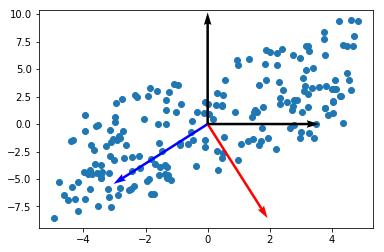

In [254]:
plt.scatter(x = df.a, y = df.b)
origin = [0], [0] # origin point

plt.quiver(*origin, eig_vecs[:,0], eig_vecs[:,1], color=['b','r'], scale=3)
plt.quiver(*origin, [0,1], [1,0], scale=3) #color=['r','b','g'], 
plt.show()

# project

## first principle

In [297]:
dot_v = np.sum(df_values*eig_vecs[:,1], axis = 1)

In [298]:
project = eig_vecs[:,1]*(dot_v[None].T)

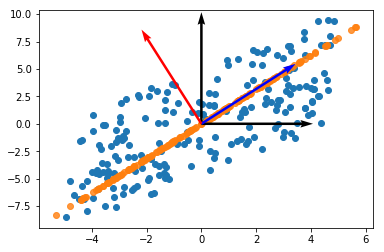

In [305]:
plt.scatter(x = df.a, y = df.b)
plt.scatter(project[:, 0], project[:, 1], alpha=0.8)
plt.quiver(*origin, [0,1], [1,0], scale=3) #color=['r','b','g'], 
plt.quiver(*origin, -eig_vecs[:,0], -eig_vecs[:,1], color=['b','r'], scale=3)